In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import h5py
import json
import matplotlib.pyplot as plt
import sparse
from pathlib import Path

In [2]:
from metric import compute_improvement

In [16]:
from plotting import *

## Visualization of a single raw event 

In [19]:
hits, true_energy = load_tree("0.root")

plotting...


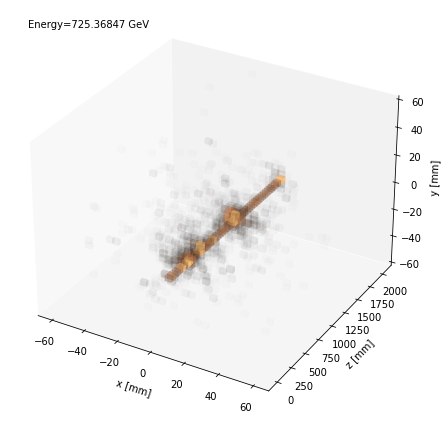

In [18]:
plot_eventdisplay(1, hits, true_energy, usegrid=False, save=False)

## Load preprocessed data

In [3]:
PATH = Path("/home/centos/mount_point/data/cmu_challenge/")

In [5]:
def get_data(file_name:str, path:Path=PATH):
    
    file = h5py.File(path/file_name, "r+")
    cont_feats = json.loads(file['meta_data/cont_feats'][()])
    hl_inputs = file['fold_0/inputs'][()]  # muon x feature numpy array
    targets = file['fold_0/targets'][()]  # muon x 1
    file.close()
    return hl_inputs, targets

In [6]:
X_train, y_train = get_data('muon_calo_train.hdf5')

In [7]:
X_test_labelled, y_test_labelled = get_data('muon_calo_test_labelled.hdf5')

In [8]:
X_test, y_test = get_data('muon_calo_test.hdf5')

## Regression with a Boosted Decision Tree with high level features

In [9]:
# create an xgboost regression model
bdt = xgb.XGBRegressor(objective='reg:squarederror')

In [10]:
bdt.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
y_pred = bdt.predict(X_test_labelled) # Predictions

In [12]:
y_pred

array([2129.0425, 6136.543 , 5753.5376, ..., 5665.785 , 1102.0645,
       3750.055 ], dtype=float32)

Text(0, 0.5, 'E_pred')

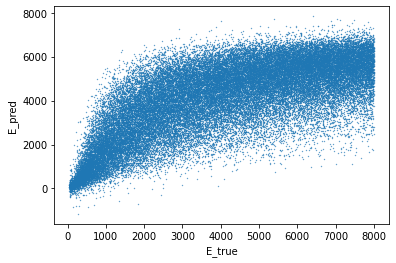

In [13]:
plt.scatter(y_test_labelled, y_pred, s=0.1)
plt.xlabel("E_true")
plt.ylabel("E_pred")

### Compute improvement

In [14]:
df = pd.DataFrame({'pred': y_pred, 'target': y_test_labelled})

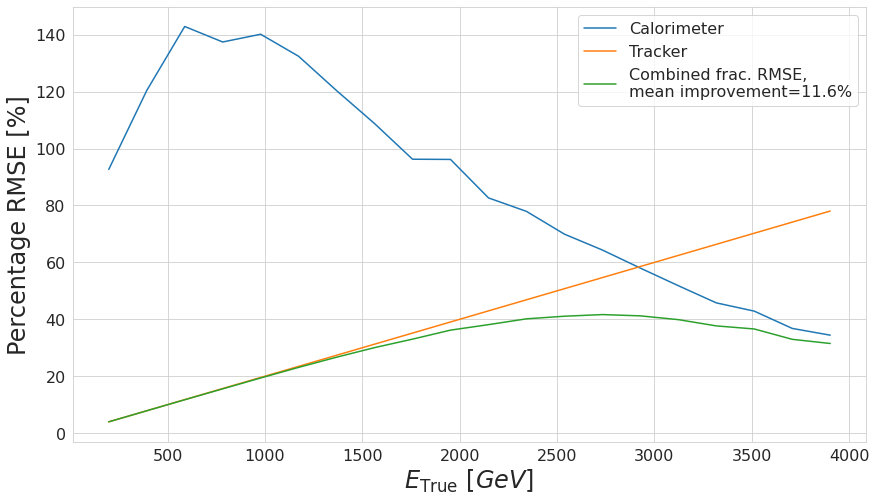

0.11592174830577243

In [15]:
compute_improvement(df)